## Deployment

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
wine = pd.read_csv('../data/white_wine.csv')
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6.0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6.0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6.0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0


## Preprocess

In [4]:
wine.isna().sum()/len(wine)*100

fixed acidity           0.000000
volatile acidity        0.000000
citric acid             0.000000
residual sugar          0.000000
chlorides               0.000000
free sulfur dioxide     0.000000
total sulfur dioxide    0.000000
density                 0.000000
pH                      0.192308
sulphates               0.192308
alcohol                 0.192308
quality                 0.192308
dtype: float64

C:\Users\R7891\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='alcohol', ylabel='Density'>

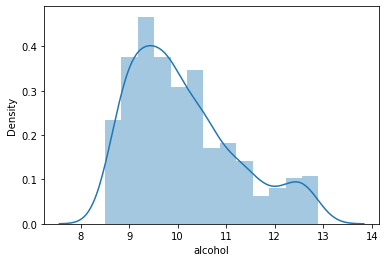

In [5]:
sns.distplot(wine['alcohol'])

In [6]:
wine['label'] = np.where(wine['quality']>0.6,1,0)

In [7]:
wine.dropna(inplace=True)

In [8]:
wine.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
label                   0
dtype: int64

In [9]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,label
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6.0,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6.0,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6.0,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0,1


In [10]:
wine_deploy = wine[['alcohol', 'density', 'fixed acidity', 'chlorides', 'label']]

# ini ngga usah ditiru, cuman contoh
wine_train = wine_deploy[:400]
wine_test = wine_deploy[400:]

## Model Training

In [18]:
# Basic Operations
import pandas as pd
import numpy as np

# ML Models
from sklearn.linear_model import LogisticRegression

# Feature Engineering
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures, KBinsDiscretizer
from sklearn.compose import ColumnTransformer

# Evaluation
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

# Model
import pickle
import joblib

In [13]:
wine_train.head()

,alcohol,density,fixed acidity,chlorides,label
0,8.8,1.0010,7.0,0.045,1
1,9.5,0.9940,6.3,0.049,1
2,10.1,0.9951,8.1,0.050,1
3,9.9,0.9956,7.2,0.058,1
4,9.9,0.9956,7.2,0.058,1


In [15]:
poly = PolynomialFeatures(degree=3, include_bias=False)

transformer = ColumnTransformer([
    ('poly', poly, ['alcohol', 'density']),
    ('bin', KBinsDiscretizer(n_bins=3, encode='onehot', strategy='quantile'), ['fixed acidity', 'chlorides'])
])

In [16]:
X = wine_train.drop('label', axis=1)
y = wine_train['label']

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, stratify=y, random_state=2020)

model = LogisticRegression(random_state=2020)

estimator = Pipeline([
    ('preprocess', transformer),
    ('clf', model)
])

In [19]:
hyperparam_space = {
    'clf__C': [100, 10, 1, 0.1, 0.01, 0.001],
    'clf__solver': ['liblinear', 'newton-cg']
}

skfold = StratifiedKFold(n_splits=5)

grid = GridSearchCV(
    estimator,
    param_grid = hyperparam_space,
    cv = skfold,
    scoring = 'f1',
    n_jobs=-1,
    verbose=1
)

grid.fit(X_train_val, y_train_val)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   10.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   10.6s finished


ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 1